In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization,Activation, Conv2D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

#(fully connected feed-forward network)
df = pd.read_csv('demographic.csv')
df = df.drop(columns = ['title','genres','Action','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'])
df.head()
scaler = StandardScaler()
scaler.fit(df.drop('Adventure', axis=1))
scaled_features = pd.DataFrame(scaler.transform(df.drop('Adventure', axis=1)),columns=df.columns[:-1])
scaled_features.head()
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, df['Adventure'], random_state=0)
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, Y_train, epochs=30)
Y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(Y_test, Y_pred), '\n', classification_report(Y_test, Y_pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1058/1058 [==============================] - 6s 5ms/step - loss: 0.2884 - accuracy: 0.9221
Epoch 2/30
1058/1058 [==============================] - 6s 5ms/step - loss: 0.2520 - accuracy: 0.9240
Epoch 3/30
1058/1058 [==============================] - 6s 5ms/step - loss: 0.2511 - accuracy: 0.9245
Epoch 4/30
1058/

Found 4955 images belonging to 50 classes.


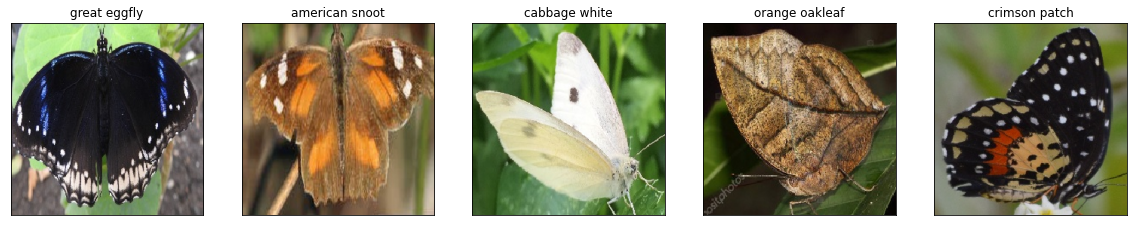

Found 4955 images belonging to 50 classes.
Found 250 images belonging to 50 classes.
Found 250 images belonging to 50 classes.
171327488/171317808 [==============================] - 10s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 2048)              20

C:\Users\Vika\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
20/20 [==============================] - ETA: 0s - loss: 2.2414 - accuracy: 0.4912 
Epoch 00001: val_accuracy improved from -inf to 0.78400, saving model to .\weights.hdf5


C:\Users\Vika\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


20/20 [==============================] - 744s 35s/step - loss: 2.2414 - accuracy: 0.4912 - val_loss: 1.6295 - val_accuracy: 0.7840
Epoch 2/5
20/20 [==============================] - ETA: 0s - loss: 0.8200 - accuracy: 0.7633 
Epoch 00002: val_accuracy improved from 0.78400 to 0.86800, saving model to .\weights.hdf5
20/20 [==============================] - 610s 31s/step - loss: 0.8200 - accuracy: 0.7633 - val_loss: 0.6195 - val_accuracy: 0.8680
Epoch 3/5
20/20 [==============================] - ETA: 0s - loss: 0.5515 - accuracy: 0.8317 
Epoch 00003: val_accuracy improved from 0.86800 to 0.92000, saving model to .\weights.hdf5
20/20 [==============================] - 622s 31s/step - loss: 0.5515 - accuracy: 0.8317 - val_loss: 0.3059 - val_accuracy: 0.9200
Epoch 4/5
20/20 [==============================] - ETA: 0s - loss: 0.4323 - accuracy: 0.8767 
Epoch 00004: val_accuracy improved from 0.92000 to 0.93200, saving model to .\weights.hdf5
20/20 [==============================] - 584s 29s/st

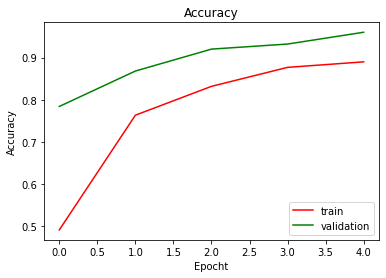

In [15]:
#згорткової (convolutional) нейромережі

import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
from keras.applications import resnet_v2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
%matplotlib inline
generator = ImageDataGenerator()
batches   = generator.flow_from_directory('train')
indices = batches.class_indices
labels  = list(indices.keys())
for X, y in batches:
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    for i in range(0,5):
        img = X[i].astype('int')
        label = labels[np.argmax(y[i])]
        ax[i].imshow(img)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()
    break
train_datagen = ImageDataGenerator(rescale = 1/255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2,shear_range=0.2,rotation_range=30,fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen  = ImageDataGenerator(rescale = 1/255)
train_directory = 'train'
val_directory   = 'valid'
test_directory  = 'test'
train_generator=train_datagen.flow_from_directory(train_directory,target_size=(224,224),color_mode='rgb',class_mode='sparse',batch_size=256)
val_generator=valid_datagen.flow_from_directory(val_directory,target_size=(224,224),color_mode='rgb',class_mode='sparse',batch_size=256)
test_gemerator=test_datagen.flow_from_directory(test_directory,target_size=(224,224),color_mode='rgb',class_mode='sparse',batch_size=256)
convlayer = resnet_v2.ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='softmax'))
print(model.summary())
opt=tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
filepath = './weights.hdf5'
earlystopping = EarlyStopping(monitor = 'val_accuracy',mode = 'max',patience = 10,verbose = 1)
checkpoint    = ModelCheckpoint(filepath,monitor = 'val_accuracy',mode='max',save_best_only=True,verbose = 1)
callback_list = [earlystopping, checkpoint]
model_history=model.fit(train_generator,validation_data=val_generator,epochs = 5,callbacks = callback_list,verbose = 1)
plt.plot(model_history.history['accuracy'],c='red')
plt.plot(model_history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epocht')
plt.legend(['train','validation'],loc='lower right')

13704
32
mean_size: 1309.43102
median_size: 970.0
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 2)            2000      
                                                                 
 dense_9 (Dense)             (None, 100, 32)           96        
                                                                 
 dense_10 (Dense)            (None, 100, 32)           1056      
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bid

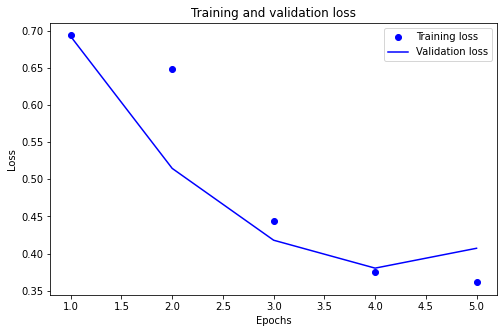

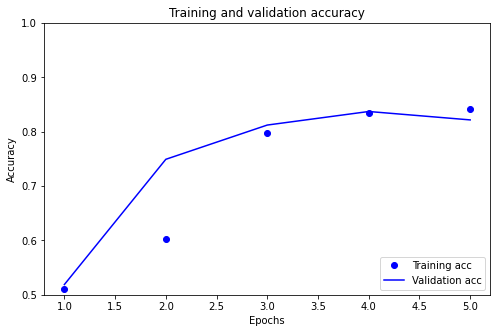

In [42]:
#прогнозування значень часового ряду за допомогою рекурентної нейромережі.

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv", names=['review', 'sentiment'], header=0, encoding='utf-8')
df.head()
document_lenghts = list(map(len, df.review.values))
print(np.max(document_lenghts))
print(np.min(document_lenghts))
print('mean_size:',np.mean(document_lenghts))
print('median_size:',np.median(document_lenghts))
df.sentiment.value_counts()
dictionary_length = 1000
input_length = 100
tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(df.review.values)
post_seq = tokenizer.texts_to_sequences(df.review.values)
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)
x_original = post_seq_padded
x_original = np.array(x_original)
y_original = df['sentiment'].values
y_original = 1*(y_original=='positive')
y_original = np.array(y_original)
x, y = shuffle(x_original, y_original)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=23)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=23)
model = Sequential()
model.add(Embedding(dictionary_length, 2, input_length=input_length))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=5, validation_data=(x_val, y_val))
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()